<a href="https://colab.research.google.com/github/ChanhyeongJo/FinopsysProject/blob/main/%EC%B9%B4%EB%93%9C%ED%9A%8C%EC%9B%90%EC%A0%95%EB%B3%B4%20%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%812_%EC%A1%B0%EC%B0%AC%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

# library import
import numpy as np
import pandas as pd
import glob

# 시각화 library import
!pip install missingno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 오류안나게
import matplotlib.pyplot as plt
from matplotlib import font_manager

#font_fname = 'C:\\Windows\\Fonts\\batang.ttc' # 아래한글 함초롱바탕 글꼴
#font_family = font_manager.FontProperties(fname=font_fname).get_name()
#plt.rcParams['font.family'] = font_family

!pip install kmodes
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.utils import resample

In [5]:
cluster_data= pd.read_csv('범주형클러스터링_회원정보.csv')

In [6]:
# 범주형 컬럼만 선택
categorical_columns = ['Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종']

In [7]:
# 범주형 컬럼의 인덱스 얻기
categorical_columns_indices = [cluster_data.columns.get_loc(col) for col in categorical_columns]
#print(categorical_columns_indices)

In [8]:
# 데이터의 20%를 샘플링
sampled_data = resample(cluster_data, n_samples=int(len(cluster_data) * 0.2), random_state=42)

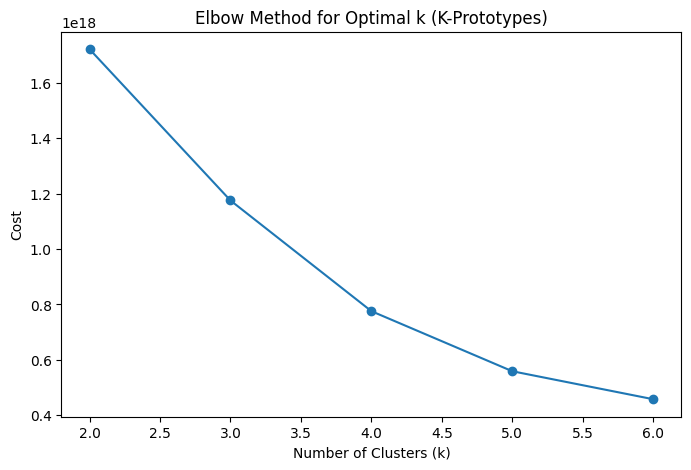

In [9]:
# 클러스터 개수와 비용 저장
costs = []
k_values = range(2, 7)  # 클러스터 개수를 2부터 6까지 시도

# K-Prototypes 실행
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Huang', n_init=2, random_state=42)
    kproto.fit(sampled_data, categorical=categorical_columns_indices)  # 범주형 컬럼 전달
    costs.append(kproto.cost_)

# 엘보우 그래프
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k (K-Prototypes)')
plt.show()

In [10]:

sampled_data = sampled_data[['정규화_부유도','Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종']]


In [11]:
# 수치형과 범주형 컬럼 구분
numeric_columns = ['정규화_부유도']
categorical_columns = ['Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종']

# 범주형 컬럼 인덱스
categorical_columns_indices = [sampled_data.columns.get_loc(col) for col in categorical_columns]

# 수치형 데이터
data_numeric = sampled_data[numeric_columns].values

# 범주형 데이터의 인덱스 구하기
categorical_columns_indices = [sampled_data.columns.get_loc(col) for col in categorical_columns]


In [12]:
# K-Prototypes 실행
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42)
clusters = kproto.fit_predict(sampled_data.values, categorical=categorical_columns_indices)

# 클러스터 결과를 데이터프레임에 추가
sampled_data['Cluster'] = clusters


In [15]:
sampled_data.head()

,정규화_부유도,Life_Stage,VIP등급코드,1순위업종,2순위업종,3순위업종,Cluster
121958,2.190502,4,Missing,Missing,Missing,Missing,3
146867,3.207057,4,7.0,교육,쇼핑,납부,0
131932,4.334993,3,7.0,쇼핑,사교활동,교통,2
103694,2.296477,6,Missing,쇼핑,교통,사교활동,0
119879,2.238353,4,Missing,납부,쇼핑,Missing,3


In [16]:
cluster_data.shape

(179647, 84)

In [17]:
sampled_data.shape

(35929, 7)

In [18]:
# 클러스터 결과를 포함한 데이터프레임을 CSV로 저장
sampled_data.to_csv('sampled_data_with_clusters.csv', index=False, encoding='utf-8-sig')

print("CSV 파일로 저장되었습니다: sampled_data_with_clusters.csv")

from google.colab import files

# 파일 다운로드
files.download('sampled_data_with_clusters.csv')

CSV 파일로 저장되었습니다: sampled_data_with_clusters.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>